In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from openai import OpenAI
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

## 1. Read Input and Ouput data of GPT-4o

- In case of Zeroshot and CoT, substitute result file path below

In [ ]:
file_path = 'data.csv'
data = pd.read_csv(file_path, encoding='utf-8')
data = data.values.tolist()
data = [[x[0], x[1]] for x in data]

result_fewshot_file_name = "data/batch_job_fewshot_results.jsonl"
results_fewshot = []

with open(result_fewshot_file_name, 'r') as file:
    for line in file:
        json_obj = json.loads(line.strip())
        results_fewshot.append(json_obj)

- How to Collect cleaning index
<br>
<br>In our case, we observed and removed missing values by dividing the data according to length quantiles. 
As a result, 90% of the missing values were observed in the data with the shortest length (q1).
<br>Therefore, although we handled it this way to preserve as much data as possible, if the goal is replication, it is also acceptable to simply remove data with lengths less than q1.

In [6]:
onion_filtered = [2, 5, 14, 24, 28, 30, 73, 99, 102, 119, 123, 135, 153, 165, 168, 176, 182, 206, 212, 228, 248, 262, 297, 322, 332, 336, 343, 362, 385, 405, 414, 430, 450, 537, 573, 583, 609, 610, 615, 629, 639, 703, 714, 717, 725, 745, 782, 821, 835, 923, 927, 988, 1000, 1004, 1011, 1016, 1027, 1053, 1055, 1059, 1115, 1145, 1155, 1159, 1165, 1222, 1234, 1239, 1251, 1258, 1266, 1271, 1317, 1329, 1402, 1418, 1429, 1445, 1456, 1470, 1471, 1492, 1525, 1529, 1588, 1599, 1606, 1610, 1629, 1640, 1648, 1661, 1663, 1672, 1692, 1715, 1727, 1731, 1734, 1742, 1743, 1747, 1756, 1783, 1811, 1813, 1873, 1895, 1924, 1952, 1976, 1990, 1991, 2000, 2024, 2028, 2044, 2086, 2089, 2117, 2119, 2129, 2156, 2167, 2171, 2200, 2203, 2208, 2254, 2285, 2302, 2320, 2333, 2382, 2399, 2419, 2469, 2470, 2472, 2492, 2501, 2565, 2586, 2605, 2622, 2637, 2643, 2656, 2658, 2742, 2746, 2764, 2808, 2823, 2834, 2849, 2860, 2878, 2884, 2909, 2928, 2933, 2966, 2974, 2988, 3030, 3040, 3066, 3077, 3097, 3103, 3112, 3119, 9, 23, 33, 40, 42, 50, 82, 100, 156, 160, 180, 197, 234, 242, 249, 253, 280, 281, 282, 337, 367, 368, 421, 423, 441, 456, 462, 475, 505, 518, 525, 540, 566, 571, 603, 684, 719, 742, 750, 752, 771, 775, 792, 820, 825, 832, 833, 840, 872, 886, 890, 940, 941, 942, 1023, 1026, 1043, 1052, 1069, 1076, 1114, 1129, 1162, 1173, 1233, 1240, 1249, 1267, 1274, 1310, 1352, 1368, 1410, 1432, 1437, 1443, 1451, 1543, 1584, 1592, 1637, 1642, 1657, 1724, 1767, 1784, 1807, 1865, 1869, 1968, 2002, 2008, 2020, 2021, 2045, 2098, 2115, 2152, 2170, 2174, 2191, 2195, 2255, 2314, 2334, 2340, 2343, 2383, 2393, 2408, 2439, 2471, 2483, 2490, 2531, 2542, 2548, 2625, 2690, 2733, 2736, 2737, 2750, 2758, 2842, 2852, 2897, 2907, 2920, 2921, 2937, 2940, 2954, 2970, 2978, 2981, 3001, 3016, 3020, 3060, 3086, 3088, 3106, 3133, 1373]
reddit_filtered = [251, 283, 446, 497, 521, 532, 578, 587, 593, 596, 624, 627, 631, 682, 683, 748, 756, 784, 797, 803, 874, 877, 889, 897, 899, 910, 922, 931, 944, 972, 1009, 1020, 1033, 1116, 1123, 1128, 1136, 1139, 1157, 1158, 1168, 1241, 1248, 1256, 1265, 1268, 1273, 1280, 1287, 1288, 1290, 1302, 1313, 1320, 1325, 1335, 1344, 1350, 1354, 1356, 1361, 1364, 1403, 1404, 1412, 1415, 1427, 1440, 1462, 1472, 1477, 1481, 1491, 1503, 1508, 1515, 1517, 1534, 1549, 1557, 1560, 1562, 1566, 1571, 1572, 1609, 1611, 1615, 1618, 1627, 1652, 1660, 1666, 1684, 1695, 1704, 1710, 1711, 1741, 1749, 1755, 1766, 1782, 1786, 1787, 1799, 1802, 1810, 1822, 1824, 1838, 1850, 1851, 1875, 1884, 1890, 1892, 1896, 1898, 1908, 1926, 1944, 1951, 1964, 1997, 2010, 2013, 2034, 2038, 2040, 2055, 2062, 2064, 2065, 2066, 2082, 2090, 2092, 2093, 2111, 2118, 2128, 2130, 2133, 2138, 2142, 2145, 2148, 2151, 2159, 2177, 2194, 2199, 2201, 2206, 2211, 2215, 2230, 2238, 2245, 2274, 2284, 2286, 2293, 2307, 2324, 2331, 2335, 2338, 2339, 2345, 2348, 2350, 2361, 2367, 2368, 2370, 2371, 2398, 2400, 2409, 2420, 2421, 2431, 2435, 2437, 2440, 2441, 2454, 2456, 2462, 2474, 2479, 2484, 2487, 2493, 2498, 2499, 2511, 2512, 2513, 2523, 2525, 2559, 2571, 2576, 2579, 2587, 2590, 2591, 2609, 2611, 2612, 2617, 2620, 2627, 2638, 2642, 2652, 2655, 2662, 2665, 2668, 2669, 2684, 2693, 2703, 2704, 2716, 2718, 2720, 2726, 2731, 2739, 2743, 2744, 2751, 2760, 2788, 2789, 2791, 2793, 2795, 2797, 2800, 2802, 2809, 2814, 2820, 2835, 2855, 2857, 2863, 2870, 2874, 2875, 2882, 2885, 2893, 2896, 2901, 2912, 2916, 2917, 2918, 2924, 2926, 2939, 2941, 2943, 2944, 2945, 2946, 2951, 2957, 2967, 2973, 2982, 2989, 2997, 2999, 3002, 3010, 3013, 3014, 3018, 3029, 3034, 3043, 3046, 3048, 3056, 3058, 3070, 3074, 3079, 3085, 3114, 3125, 3129, 3132, 3134, 3135, 548, 667, 704, 721, 740, 860, 904, 953, 1013, 1045, 1058, 1071, 1207, 1210, 1261, 1284, 1332, 1346, 1482, 1494, 1523, 1617, 1646, 1762, 1775, 1367, 1930, 1938, 1966, 2063, 2070, 2218, 2313, 2707, 2725, 2790, 2845, 2892, 3005, 69, 148, 196, 211, 346, 919, 2500, 3069, 10, 145, 185, 221, 229, 370, 418, 917, 932, 935,  1291, 1511, 1771, 1907, 1972, 2927, 2968, 3082]
fewshot_given = [0]

filter_indices = onion_filtered + reddit_filtered + fewshot_given

assert(len(filter_indices) == len(set(filter_indices)))

print(f"Number of onion filtered data: {len(onion_filtered)}")
print(f"Number of reddit filtered data: {len(reddit_filtered)}")
print(f"Number of filtered data: {len(filter_indices)}")

True
Number of onion filtered data: 318
Number of reddit filtered data: 368
Number of filtered data: 687


count     2451.000000
mean      2243.185231
std       2419.292430
min        110.000000
25%       1009.000000
50%       1433.000000
75%       2788.000000
max      36394.000000
dtype: float64


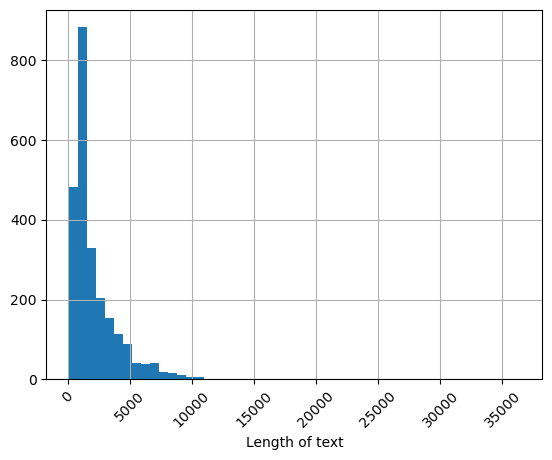

In [23]:
data_filtered = [len(data[i][0]) for i in range(len(data)) if i not in filter_indices]
data_filtered = pd.Series(data_filtered)
print(data_filtered.describe())

# hist
plt.hist(data_filtered, bins=50)
plt.xlabel('Length of text')
plt.xticks(rotation=45)
plt.grid(True)          
plt.show()


In [7]:
correct_list_fewshot = [0]*len(data)
pred_list = [0]*len(data)

for res in results_fewshot:
    task_id = res['custom_id']
    
    # getting index from task id
    idx = int(task_id)
    result = res['response']['body']['choices'][0]['message']['content'] # rationale + 0 or 1
    fred = result[-1]
    
    # check if the last character is 0 or 1
    # if not, pick the last second character 
    if fred != '0' and fred != '1':
        fred = result[-2]
    
    # 그럼에도 0이나 1이 아닌 경우가 있으면 출력한 뒤 종료
    if fred != '0' and fred != '1':
        print(f'The result is not 0 or 1: {fred}')
        break
    
    pred_list[idx] = int(fred)
    
    if fred == str(data[idx][1]):
        correct_list_fewshot[idx] = 1 # correct
    else:
        correct_list_fewshot[idx] = 0
        
# calculate the accuracy
filtered_correct_list = [correct_list_fewshot[i] for i in range(len(correct_list_fewshot)) if i not in filter_indices]
filtered_pred_list = [pred_list[i] for i in range(len(pred_list)) if i not in filter_indices]
filtered_y_true = [data[i][1] for i in range(len(data)) if i not in filter_indices]

# calculate the accuracy
accuracy_fewshot = sum(filtered_correct_list) / len(filtered_correct_list)

print(f'The accuracy of the Fewshot cot prompt: {accuracy_fewshot}')

The accuracy of the Fewshot cot prompt: 0.9473684210526315


## 2. Calculate the Precision, Recall and F1

In [8]:
y_true = filtered_y_true
y_pred = filtered_pred_list

# 0: Onion, 1: Reddit
target_names = ['Onion', 'Reddit']

# calculate AUC score
roc_auc = roc_auc_score(y_true, y_pred)

# print
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
print(f'The AUC score of the Fewshot cot prompt: {roc_auc}')

              precision    recall  f1-score   support

       Onion     0.9249    0.9760    0.9497      1249
      Reddit     0.9735    0.9176    0.9448      1202

    accuracy                         0.9474      2451
   macro avg     0.9492    0.9468    0.9473      2451
weighted avg     0.9487    0.9474    0.9473      2451

The AUC score of the Fewshot cot prompt: 0.9468090279211723


In [9]:
# collect error case
reddit_error_case = []

for i in range(len(filtered_y_true)):
    if filtered_y_true[i] != filtered_pred_list[i]:
        reddit_error_case.append(i)

print(f'The number of error cases in Reddit: {len(reddit_error_case)}')

The number of error cases in Reddit: 129


The Number of error case in Reddit: 99
count       99.000000
mean      2526.090909
std       3685.641746
min        189.000000
25%       1010.500000
50%       1973.000000
75%       2791.000000
max      35548.000000
dtype: float64
The Number of Reddit: 1202
count     1202.000000
mean      3484.475874
std       2954.268630
min        186.000000
25%       1778.000000
50%       2824.500000
75%       4368.250000
max      36394.000000
dtype: float64


(array([19., 19., 20., 21.,  7.,  4.,  2.,  1.,  2.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  189.  ,   896.18,  1603.36,  2310.54,  3017.72,  3724.9 ,
         4432.08,  5139.26,  5846.44,  6553.62,  7260.8 ,  7967.98,
         8675.16,  9382.34, 10089.52, 10796.7 , 11503.88, 12211.06,
        12918.24, 13625.42, 14332.6 , 15039.78, 15746.96, 16454.14,
        17161.32, 17868.5 , 18575.68, 19282.86, 19990.04, 20697.22,
        21404.4 , 22111.58, 22818.76, 23525.94, 24233.12, 24940.3 ,
        25647.48, 26354.66, 27061.84, 27769.02, 28476.2 , 29183.38,
        29890.56, 30597.74, 31304.92, 32012.1 , 32719.28, 33426.46,
        34133.64, 34840.82, 35548.  ]),
 <BarContainer object of 50 artists>)

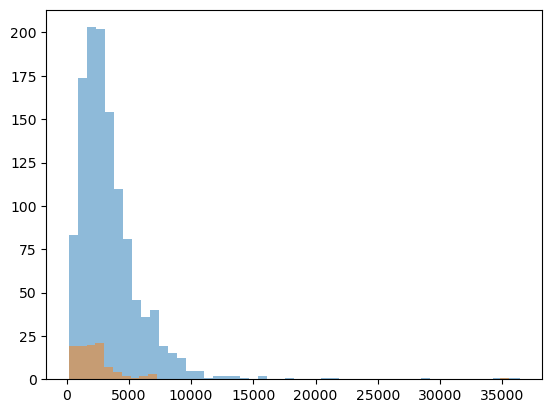

In [10]:
# Error case length
error_case_length = []
for i in range(len(data)):
    if i not in filter_indices and data[i][1] == 1 and pred_list[i] == 0:
        error_case_length.append(len(data[i][0]))

# Entire Reddit length
reddit_length = []
for i in range(len(data)):
    if i not in filter_indices and data[i][1] == 1:
        reddit_length.append(len(data[i][0]))

# stat and plot
reddit_length = pd.Series(reddit_length)
error_case_length = pd.Series(error_case_length)
print(f"The Number of error case in Reddit: {len(error_case_length)}")
print(error_case_length.describe())
print("="*50)

print(f"The Number of Reddit: {len(reddit_length)}")
print(reddit_length.describe())
print("="*50)


plt.hist(reddit_length, bins=50, alpha=0.5, label='Reddit')

- Comparison of the accuracy on Length of Reddit data

In [11]:
med = 2824
reddit_length_under_med = []
error_case_length_under_med = []
reddit_length_over_med = []
error_case_length_over_med = []
error_idx_under_med = []
error_idx_over_med = []

for i in range(len(data)):
    if i not in filter_indices and data[i][1] == 1:
        if len(data[i][0]) <= med:
            reddit_length_under_med.append(len(data[i][0]))
            if data[i][1] == 1 and pred_list[i] == 0:
                error_case_length_under_med.append(len(data[i][0]))
                error_idx_under_med.append(i)
        else:
            reddit_length_over_med.append(len(data[i][0]))
            if data[i][1] == 1 and pred_list[i] == 0:
                error_case_length_over_med.append(len(data[i][0]))
                error_idx_over_med.append(i)

# 길이별 accuracy 계산
acc_under_med = 1 - len(error_case_length_under_med) / len(reddit_length_under_med)
acc_over_med = 1 - len(error_case_length_over_med) / len(reddit_length_over_med)
assert len(reddit_length_under_med) == 601
print(f"The accuracy of Reddit with length <= median: {acc_under_med}")
print(f"The accuracy of Reddit with length > median: {acc_over_med}")

acc_overall = 1 - (len(error_case_length_under_med) + len(error_case_length_over_med)) / (len(reddit_length_under_med) + len(reddit_length_over_med))
print(f"The overall accuracy of Reddit: {acc_overall}")

with open('reddit_error_under_med.txt', 'w') as f:
    for i in error_idx_under_med:
        f.write(f"Index: {i}\n")
        f.write(f"Length: {len(data[i][0])}\n")
        f.write(f"Text:\n{data[i][0]}\n")
        f.write("="*50 + "\n\n")


with open('reddit_error_over_med.txt', 'w') as f:
    for i in error_idx_over_med:
        f.write(f"Index: {i}\n")
        f.write(f"Length: {len(data[i][0])}\n")
        f.write(f"Text:\n{data[i][0]}\n")
        f.write("="*50 + "\n\n")

The accuracy of Reddit with length <= median: 0.8752079866888519
The accuracy of Reddit with length > median: 0.9600665557404326
The overall accuracy of Reddit: 0.9176372712146422


## 3. Memorization check

In [11]:
onion = pd.read_csv("onion_csv/onion_indexO1.csv")

# concat all the csv files
# onion index 02 ~ 10
for i in range(9):
    onion_index = pd.read_csv(f"onion_csv/onion_indexO{i+2}.csv")
    onion = pd.concat([onion, onion_index], ignore_index=True)

onion = onion.sort_values(by='Date', ascending=False)
onion = onion.dropna(subset=['Title', 'Content'])
onion = onion[~onion['Content'].str.contains("Previous Slide Next Slide List slides")]
onion = onion[onion['Content'].str.count("Advertisement") < 2]
onion = onion.reset_index(drop=True)
onion = onion.iloc[:1569, :]


reddit = pd.read_csv('reddit_csv/reddit_indexO.csv')
reddit1 = pd.read_csv('reddit_csv/realreddit_indexO1.csv', encoding='utf-8')
reddit2 = pd.read_csv('reddit_csv/realreddit_indexO2.csv', encoding='utf-8')
reddit = pd.concat([reddit, reddit1, reddit2])
reddit = reddit.dropna(subset=['Title', 'Content'])
reddit = reddit.reset_index(drop=True)

########################################

origin = pd.concat([onion, reddit])
origin['Text'] = '[Title]\n' + origin['Title'] + '\n' + '[Contents]\n' + origin['Content']

In [12]:
file_path = 'data.csv'
data2 = pd.read_csv(file_path, encoding='utf-8')

# Create a dictionary to map Text to Date for origin data
text_to_date = {row['Text']: row['Date'] for _, row in origin.iterrows()}

# Add Date column to data2 by mapping text to date
data2['Date'] = data2['text'].map(text_to_date)
cutoff_date_str = '2023-11-01'

data_before = data2[data2['Date'] < cutoff_date_str]
data_after = data2[data2['Date'] >= cutoff_date_str]

idx_before = data_before.index.to_list() # 1308개
idx_after = data_after.index.to_list() # 972개

print(len(data_before) + len(data_after)) # 2280
print(len(data_before))
print(len(data_after))
print(data2['Date'].isna().sum()) # 858

2280
1308
972
858


In [13]:
# Remove the filter indices from before and after indices
idx_before_filtered = [idx for idx in idx_before if idx not in filter_indices]
idx_after_filtered = [idx for idx in idx_after if idx not in filter_indices]

cnt_reddit = 0
cnt_onion = 0
for i in (idx_before_filtered):
    if(data[i][1] == 1):
        cnt_reddit += 1
    else:
        cnt_onion += 1
print(f"Before cutoff -> Onion: {cnt_onion}, Reddit: {cnt_reddit}")

cnt_reddit = 0
cnt_onion = 0
for i in (idx_after_filtered):
    if(data[i][1] == 1):
        cnt_reddit += 1
    elif data[i][1] == 0:
        cnt_onion += 1
print(f"After cutoff -> Onion: {cnt_onion}, Reddit: {cnt_reddit}")

print(len(idx_before_filtered))
print(len(idx_after_filtered))

Before cutoff -> Onion: 1033, Reddit: 5
After cutoff -> Onion: 216, Reddit: 498
1038
714


- before

In [14]:
# calculate the accuracy

assert(len(pred_list) == len(data))
before_correct_list = [correct_list_fewshot[i] for i in range(len(correct_list_fewshot)) if i in idx_before_filtered]
before_pred_list = [pred_list[i] for i in (idx_before_filtered)]
before_y_true = [data[i][1] for i in (idx_before_filtered)]
print(sum(before_y_true))
print(sum(before_pred_list))
# calculate the accuracy
accuracy_fewshot = sum(before_correct_list) / len(before_correct_list)
print(accuracy_fewshot)
y_true = before_y_true
y_pred = before_pred_list

# 0: Onion, 1: Reddit
target_names = ['Onion', 'Reddit']
roc_auc = roc_auc_score(y_true, y_pred)

# print
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
print(f'The AUC score of the Fewshot cot prompt: {roc_auc}')

5
33
0.9730250481695568
              precision    recall  f1-score   support

       Onion     1.0000    0.9729    0.9863      1033
      Reddit     0.1515    1.0000    0.2632         5

    accuracy                         0.9730      1038
   macro avg     0.5758    0.9864    0.6247      1038
weighted avg     0.9959    0.9730    0.9828      1038

The AUC score of the Fewshot cot prompt: 0.9864472410454985


In [15]:
# calculate the accuracy
after_correct_list = [correct_list_fewshot[i] for i in range(len(correct_list_fewshot)) if i in idx_after_filtered]
after_pred_list = [pred_list[i] for i in range(len(pred_list)) if i in idx_after_filtered]
after_y_true = [data[i][1] for i in range(len(data)) if i in idx_after_filtered]

accuracy_fewshot = sum(after_correct_list) / len(after_correct_list)
print(accuracy_fewshot)


y_true = after_y_true
y_pred = after_pred_list

# 0: Onion, 1: Reddit
target_names = ['Onion', 'Reddit']

# calculate AUC score

roc_auc = roc_auc_score(y_true, y_pred)

# print
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
print(f'The AUC score of the Fewshot cot prompt: {roc_auc}')

0.938375350140056
              precision    recall  f1-score   support

       Onion     0.8359    0.9907    0.9068       216
      Reddit     0.9956    0.9157    0.9540       498

    accuracy                         0.9384       714
   macro avg     0.9158    0.9532    0.9304       714
weighted avg     0.9473    0.9384    0.9397       714

The AUC score of the Fewshot cot prompt: 0.9532016956715751
